Putting all together

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import IMDB dataset
training_set, testing_set = imdb.load_data(num_words=10000)
X_train, y_train = training_set
X_test, y_test = testing_set

print("Number of training samples = {}".format(X_train.shape[0]))
print("Number of testing samples = {}".format(X_test.shape[0]))

17465344/17464789 [==============================] - 0s 0us/step
Number of training samples = 25000
Number of testing samples = 25000


In [3]:
# Zero-Padding
X_train_padded = sequence.pad_sequences(X_train, maxlen=100) # maxlen = maximum length of each movie review
X_test_padded = sequence.pad_sequences(X_test, maxlen=100)

print("X_train vector shape = {}".format(X_train_padded.shape))
print("X_test vector shape = {}".format(X_test_padded.shape))

X_train vector shape = (25000, 100)
X_test vector shape = (25000, 100)


In [4]:
def train_model(Optimizer, X_train, y_train, X_val, y_val):
  model = Sequential()
  model.add(Embedding(input_dim=10000, output_dim=128))
  model.add(LSTM(units=128))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = Optimizer, metrics=['accuracy'])
  scores = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=0)
  return scores, model

In [5]:
# Train Model
RMSprop_score, RMSprop_model = train_model(Optimizer='RMSprop', X_train=X_train_padded, y_train=y_train, X_val=X_test_padded, y_val=y_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


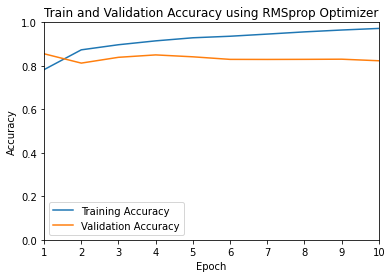

In [7]:
# Plot Accuracy per Epoch
plt.plot(range(1,11), RMSprop_score.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,11), RMSprop_score.history['val_accuracy'], label='Validation Accuracy')
plt.axis([1,10,0,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy using RMSprop Optimizer')
plt.legend()
plt.show()

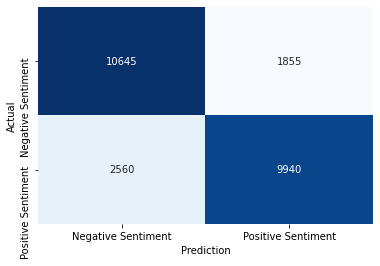

In [8]:
# Plot Confusion Matrix
y_test_pred = RMSprop_model.predict_classes(X_test_padded)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Negative Sentiment', 'Positive Sentiment'], yticklabels=['Negative Sentiment', 'Positive Sentiment'],
                 cbar = False, cmap='Blues', fmt='g')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()